# Diagnostic Checks on Mass Tracks



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd /Users/grefe950/evolve/dmestar/trk/

/Users/grefe950/evolve/dmestar/trk


Quick mass track loader

In [3]:
def loadTrack(filename):
    return np.genfromtxt(filename, usecols=(0, 1, 2, 3, 4, 5))

Preliminary definitions, including masses and file extensions.

In [4]:
masses = [0.1, 0.5, 1.0, 1.5]

# directory extensions
gs98_dir   = 'gs98/p000/a0/amlt1884'
gas07_dir  = 'gas07/p000/a0/amlt2202'
agss09_dir = 'agss09/p000/a0/amlt1991'

# file name extensions
gs98_ext   = '_GS98_p000_p0_y28_mlt1.884.trk'
gas07_ext  = '_GAS07_p000_p0_y26_mlt2.202.trk'
agss09_ext = '_AGSS09_p000_p0_y27_mlt1.991.trk'

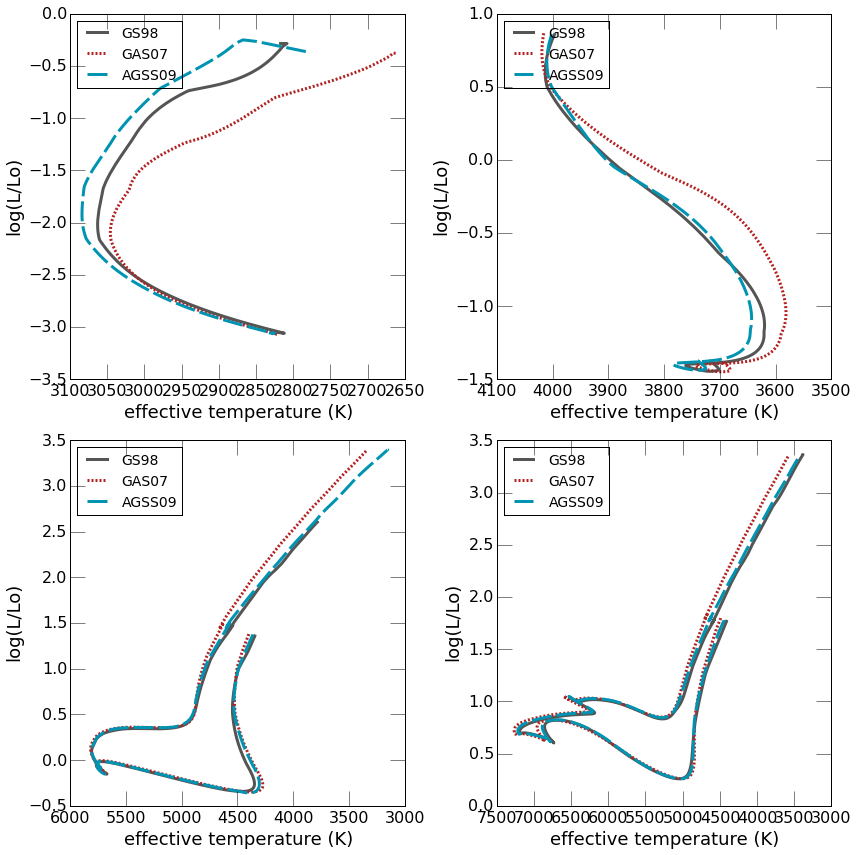

In [5]:
colors = {2:'#0094b2', 1:'#B22222', 0:'#56b4ea', 3:'#555555'}
fig, ax = plt.subplots(2, 2, figsize=(12., 12.))

for i in range(len(masses)):
    mass = masses[i]
    row  = i/2
    col  = i%2
    
    # set axis properties
    axis = ax[row, col]
    axis.tick_params(which='major', axis='both', length=15., labelsize=16.)
    axis.set_xlabel('effective temperature (K)', fontsize=18.)
    axis.set_ylabel('log(L/Lo)', fontsize=18.)
    axis.invert_xaxis()
    
    # load mass tracks
    gs98 = loadTrack('{:s}/m{:04.0f}{:s}'.format(gs98_dir, mass*1000., gs98_ext))
    gas07 = loadTrack('{:s}/m{:04.0f}{:s}'.format(gas07_dir, mass*1000., gas07_ext))
    agss09 = loadTrack('{:s}/m{:04.0f}{:s}'.format(agss09_dir, mass*1000., agss09_ext))
    
    axis.plot(10**gs98[:,1], gs98[:,3], lw=3, c=colors[3], label='GS98')
    axis.plot(10**gas07[:,1], gas07[:,3], dashes=(2.0, 2.0), lw=3, c=colors[1], label='GAS07')
    axis.plot(10**agss09[:,1], agss09[:,3], dashes=(20., 5.), lw=3, c=colors[2], label='AGSS09')
    
    axis.legend(loc=2, fontsize=14.)
fig.tight_layout()
    

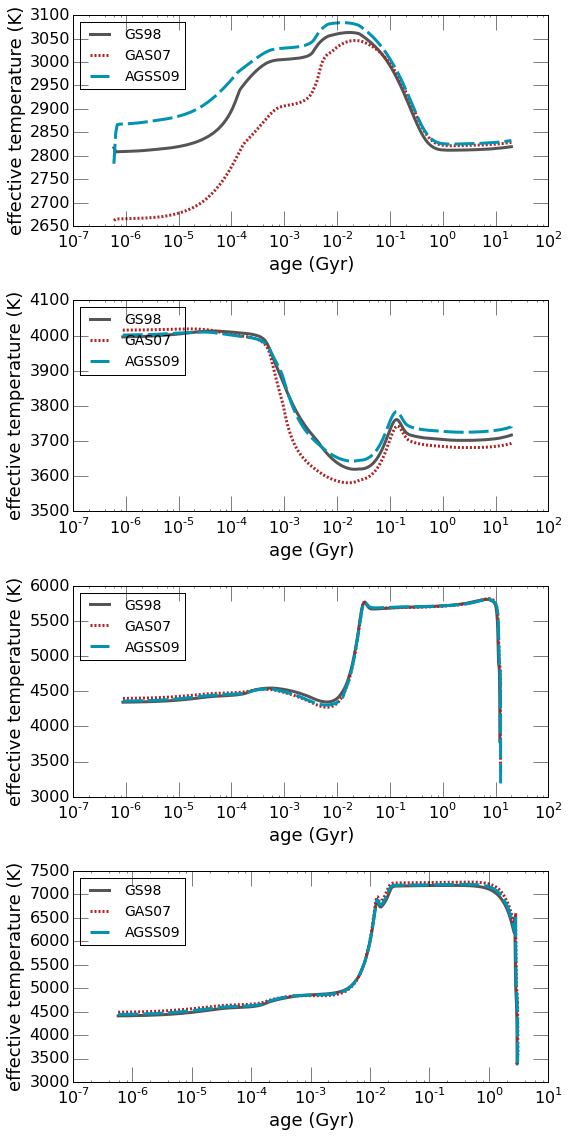

In [6]:
colors = {2:'#0094b2', 1:'#B22222', 0:'#56b4ea', 3:'#555555'}
fig, ax = plt.subplots(4, 1, figsize=(8., 16.))

for i in range(len(masses)):
    mass = masses[i]
    
    # set axis properties
    axis = ax[i]
    axis.tick_params(which='major', axis='both', length=15., labelsize=16.)
    axis.set_ylabel('effective temperature (K)', fontsize=18.)
    axis.set_xlabel('age (Gyr)', fontsize=18.)
    
    # load mass tracks
    gs98 = loadTrack('{:s}/m{:04.0f}{:s}'.format(gs98_dir, mass*1000., gs98_ext))
    gas07 = loadTrack('{:s}/m{:04.0f}{:s}'.format(gas07_dir, mass*1000., gas07_ext))
    agss09 = loadTrack('{:s}/m{:04.0f}{:s}'.format(agss09_dir, mass*1000., agss09_ext))
    
    axis.semilogx(gs98[:,0]/1.0e9, 10**gs98[:,1], lw=3, c=colors[3], label='GS98')
    axis.semilogx(gas07[:,0]/1.0e9, 10**gas07[:,1], dashes=(2.0, 2.0), lw=3, c=colors[1], label='GAS07')
    axis.semilogx(agss09[:,0]/1.0e9, 10**agss09[:,1], dashes=(20., 5.), lw=3, c=colors[2], label='AGSS09')
    
    axis.legend(loc=2, fontsize=14.)
fig.tight_layout()

It's quite curious as to why the GAS07 and AGSS09 tracks show opposite relative effects with respect to the GS98. Should look at the atmosphere structures at depth to determine if there are any intrinsic differences in the atmospheres that are causing their opposite behavior.

## Atmosphere Thermal Structure

In [7]:
cd /usr/local/dmestar/data/atm/

/usr/local/dmestar/data/atm


In [8]:
gs98_atm = np.genfromtxt('./phx/GS98/t010/Zp0d0.ap0d0_t010.dat')
gs98K_atm = np.genfromtxt('./kur/GS98/t010/kurucz_z+0.00_a+0.00_t02_tau010.sbc')
gas07_atm = np.genfromtxt('./mrc/GAS07/t010/marcs_z+0.00_a+0.00_m1.0_t02_tau010.sbc')
agss09_atm = np.genfromtxt('./phx/AGSS09/t010/Zp0d0.ap0d0_t010.dat')

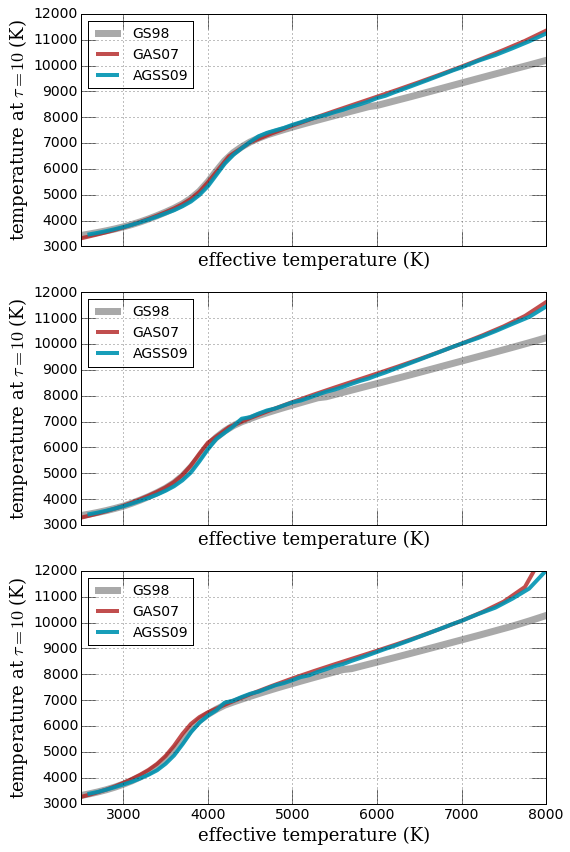

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(8., 12.), sharex=True)

for i in range(len(ax)):
    col = -3*(i + 1) + i%3
    axis = ax[i]
    axis.grid(True)
    axis.set_xlabel('effective temperature (K)', fontsize=18., family='serif')
    axis.set_ylabel('temperature at $\\tau = 10$ (K)', fontsize=18., family='serif')
    axis.set_xlim(2500., 8000.)
    axis.set_ylim(3000., 12000.)
    axis.tick_params(which='major', axis='both', length=15., labelsize=14.)
    axis.plot(gs98_atm[:,0], gs98_atm[:, col], lw=7, c=colors[3], alpha=0.5, label='GS98')
    #axis.plot(gs98K_atm[:,0], gs98K_atm[:, col], 'o', markersize=10., c=colors[0], label='GS98K')
    axis.plot(gas07_atm[:,0], gas07_atm[:, col], lw=4, c=colors[1], alpha=0.8, label='GAS07')
    axis.plot(agss09_atm[:,0], agss09_atm[:, col], lw=4, c=colors[2], alpha=0.9, label='AGSS09')
    axis.legend(loc=2, fontsize=14.)
fig.tight_layout()